<!-- Lab1 - Desenvolvido por Silmara Basso -->
# <font color='Green'>Evolução das Vendas ao Longo do Tempo</font>
## <font color='Green'>Storytelling, Dashboards e Técnicas de Apresentação Para Cientistas de Dados</font>
## <font color='Green'>Lab1 - Parte 3</font>
### <font color='Green'>Engajando a Audiência Através de História Sobre a Análise dos Dados</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

Não precisa instalar os pacotes por aqui, pois os pacotes e as respectivas versões estão no arquivo requirements.txt. Leia as instruções no arquivo LEIAME.txt.

In [2]:
# Plotly
#!pip install -q plotly

In [ ]:
# colorlover
#!pip install -q colorlover

In [3]:
# Imports
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime, timedelta
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
import colorlover as cl
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Silmara Basso" 

Author: Silmara Basso



## Carregando os Dados

In [5]:
# Carrega o dataset
df_prep = pd.read_csv('dataset1.csv')

In [6]:
# Shape
df_prep.shape

(116581, 53)

In [7]:
# Amostra dos dados
df_prep.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,8,1,18,Tue,Aug
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,Maua,SP,housewares,0.0,2017,8,2,18,Wed,Aug


In [8]:
# Copia o dataset
df = df_prep.copy()

### Feature Extraction (Extração de Atributos)

Nesta fase, novas colunas serão adicionadas contendo cálculos de várias colunas para obter novos recursos.

In [9]:
# Prepara os dados
date_columns = ['order_purchase_timestamp', 
                'order_approved_at', 
                'order_delivered_carrier_date', 
                'order_delivered_customer_date',
                'order_estimated_delivery_date', 
                'shipping_limit_date', 
                'review_creation_date', 
                'review_answer_timestamp'] 

In [10]:
# Loop para formatar as datas
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [11]:
# Cria uma coluna order_process_time para ver quanto tempo levou 
# desde o início do pedido feito pelo cliente até a entrega
df['order_process_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

In [12]:
# Cria uma coluna order_delivery_time para ver quanto tempo cada pedido levou para entrega
df['order_delivery_time'] = df['order_delivered_customer_date'] - df['order_delivered_carrier_date']

In [13]:
# Cria uma coluna order_time_accuracy para ver se o tempo estimado para entrega foi apropriado ou não
# Se o valor for positivo chegou mais rápido, se 0 então chegou no horário, mas se negativo então chegou atrasado
df['order_accuracy_time'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']

In [14]:
# Cria uma coluna order_approved_time para ver quanto tempo levou até que o pedido fosse aprovado
df['order_approved_time'] = df['order_approved_at'] - df['order_purchase_timestamp']

In [15]:
# Cria uma coluna review_send_time para descobrir 
# quanto tempo levou para a pesquisa de satisfação para ser enviada após o item recebido
df['review_send_time'] = df['review_creation_date'] - df['order_delivered_customer_date']

In [16]:
# Cria uma coluna review_answer_time para descobrir quanto tempo levou para o cliente preencher a pesquisa 
df['review_answer_time'] = df['review_answer_timestamp'] - df['review_creation_date']

In [17]:
# Combina as colunas product_length_cm, product_height_cm e product_width_cm para calcular 
# o volume da embalagem do produto com uma nova coluna, nomeadamente product_volume
df['product_volume'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

In [18]:
# Mediana do tempo de entrega de pedidos por mês
df['Month_order'] = df['order_purchase_timestamp'].dt.to_period('M').astype('str')

In [19]:
# Cópia do dataframe
df2 = df.copy()

## Cena 4 - Nível de Satisfação dos Clientes

### Pergunta 4.1 - Avaliações Por Mês e Dia da Semana

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       116581 non-null  object         
 1   order_id3                      116581 non-null  object         
 2   customer_id3                   116581 non-null  object         
 3   order_status                   116581 non-null  object         
 4   order_purchase_timestamp       116581 non-null  datetime64[ns] 
 5   order_approved_at              116581 non-null  datetime64[ns] 
 6   order_delivered_carrier_date   116581 non-null  datetime64[ns] 
 7   order_delivered_customer_date  116581 non-null  datetime64[ns] 
 8   order_estimated_delivery_date  116581 non-null  datetime64[ns] 
 9   order_item_id                  116581 non-null  float64        
 10  product_id3                    116581 non-null  object  

In [21]:
# Converte a marca temporal da resposta da avaliação para o dia da semana
df2['review_dayofweek'] = df.review_answer_timestamp.apply(lambda x: x.dayofweek)

In [22]:
df2['review_dayofweek'].head()

0    3.0
1    3.0
2    3.0
3    6.0
4    1.0
Name: review_dayofweek, dtype: float64

In [23]:
# Mapeia o número do dia da semana para o nome abreviado do dia
df2['review_day'] = df2['review_dayofweek'].map({0:'Seg', 1:'Ter', 2:'Qua', 3:'Qui', 4:'Sex', 5:'Sab', 6:'Dom'})

In [24]:
df2['review_day'].head()

0    Qui
1    Qui
2    Qui
3    Dom
4    Ter
Name: review_day, dtype: object

In [26]:
# Converte a marca temporal da resposta da avaliação para o mês e mapeia para o nome abreviado do mês
df2['review_month'] = df2.review_answer_timestamp.apply(lambda x: x.month).map({1:'Jan',
                                                                                2:'Fev',
                                                                                3:'Mar',
                                                                                4:'Abr',
                                                                                5:'Mai',
                                                                                6:'Jun',
                                                                                7:'Jul',
                                                                                8:'Ago',
                                                                                9:'Set',
                                                                                10:'Out',
                                                                                11:'Nov',
                                                                                12:'Dec'})

In [27]:
# Amostra de dados
df2.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,order_delivery_time,order_accuracy_time,order_approved_time,review_send_time,review_answer_time,product_volume,Month_order,review_dayofweek,review_day,review_month
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,6 days 01:30:13,7 days 02:34:47,0 days 00:10:42,0 days 02:34:47,1 days 03:43:48,1976.0,2017-10,3.0,Qui,Out
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,6 days 01:30:13,7 days 02:34:47,0 days 00:10:42,0 days 02:34:47,1 days 03:43:48,1976.0,2017-10,3.0,Qui,Out
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,6 days 01:30:13,7 days 02:34:47,0 days 00:10:42,0 days 02:34:47,1 days 03:43:48,1976.0,2017-10,3.0,Qui,Out
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,...,0 days 23:16:10,9 days 09:15:17,0 days 01:35:45,0 days 09:15:17,1 days 15:16:36,1976.0,2017-08,6.0,Dom,Ago
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,...,3 days 00:54:18,7 days 05:29:59,0 days 00:18:28,0 days 05:29:59,0 days 23:26:23,1976.0,2017-08,1.0,Ter,Ago


In [28]:
# Total de registros para cada avaliação
df2.review_score.value_counts()

review_score
5.0    65479
4.0    22017
1.0    15110
3.0     9842
2.0     4133
Name: count, dtype: int64

In [29]:
# Calcula a média do score de avaliação agrupando por mês e por dia da semana
review_score_per_month = df2.groupby(['review_month', 'review_day'], as_index = False).review_score.mean()

In [30]:
review_score_per_month.head()

,review_month,review_day,review_score
0,Abr,Dom,3.817905
1,Abr,Qua,3.894248
2,Abr,Qui,3.855518
3,Abr,Sab,3.846154
4,Abr,Seg,3.738133


In [31]:
# Plot

# Gráfico
fig = px.line(review_score_per_month, 
              x = "review_month", 
              y = "review_score", 
              color = 'review_day')

# Layout
fig.update_layout(title = "Avaliações Por Mês e Dia da Semana",
                  xaxis_title = "Months",
                  yaxis_title = "Review Ratings")
fig.show()

### Pergunta 4.2 - Média de Avaliações Por Categoria de Produto

In [32]:
# Média de avaliações por categoria de produto
avg_score_per_category = df2.groupby('product_category_name_english', as_index = False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['Product Category', 'Number of Reviews', 'Average Review Ratings']

In [33]:
avg_score_per_category.head()

,Product Category,Number of Reviews,Average Review Ratings
0,agro industry and commerce,252,4.150794
1,air conditioning,302,3.920530
2,art,219,3.917808
3,arts and craftmanship,24,4.125000
4,audio,381,3.824147


In [34]:
avg_score_per_category.shape

(71, 3)

In [35]:
# Filtrando categorias com mais de 100 avaliações
avg_score_per_category = avg_score_per_category[avg_score_per_category['Number of Reviews'] > 100]
avg_score_per_category = avg_score_per_category.sort_values(by = 'Number of Reviews', ascending = False)

In [36]:
avg_score_per_category.shape

(53, 3)

In [37]:
# Listando as top 10
avg_ratings = avg_score_per_category[:10]
avg_ratings

,Product Category,Number of Reviews,Average Review Ratings
7,bed bath table,11990,3.867056
43,health beauty,10030,4.119143
65,sports leisure,9005,4.092837
39,furniture decor,8833,3.895279
15,computers accessories,8151,3.926144
49,housewares,7380,4.045257
70,watches gifts,6213,4.000644
68,telephony,4726,3.938214
42,garden tools,4590,4.011329
5,auto,4400,4.038636


In [38]:
# Plot
fig = px.bar(avg_ratings, x = 'Product Category', 
             y = 'Number of Reviews',
             hover_data = ['Average Review Ratings'], 
             color = 'Average Review Ratings',
             height = 500)
fig.show()

### Pergunta 4.3 - Média de Avaliação Por Unidade da Federação do Usuário

In [39]:
# Média de avaliação por estado do usuário
avg_score_per_state = df2.groupby('customer_state', as_index = False).agg({'review_score': ['mean']})
avg_score_per_state.columns = ['customer_state', 'Average Review Ratings']

In [40]:
avg_score_per_state.head()

,customer_state,Average Review Ratings
0,AC,4.075269
1,AL,3.698690
2,AM,4.070588
3,AP,4.226190
4,BA,3.793691


In [41]:
avg_score_per_state.shape

(27, 2)

In [42]:
# Ordena o resultado por média de avaliação
avg_score_per_state = avg_score_per_state.sort_values(by = 'Average Review Ratings', ascending = True)

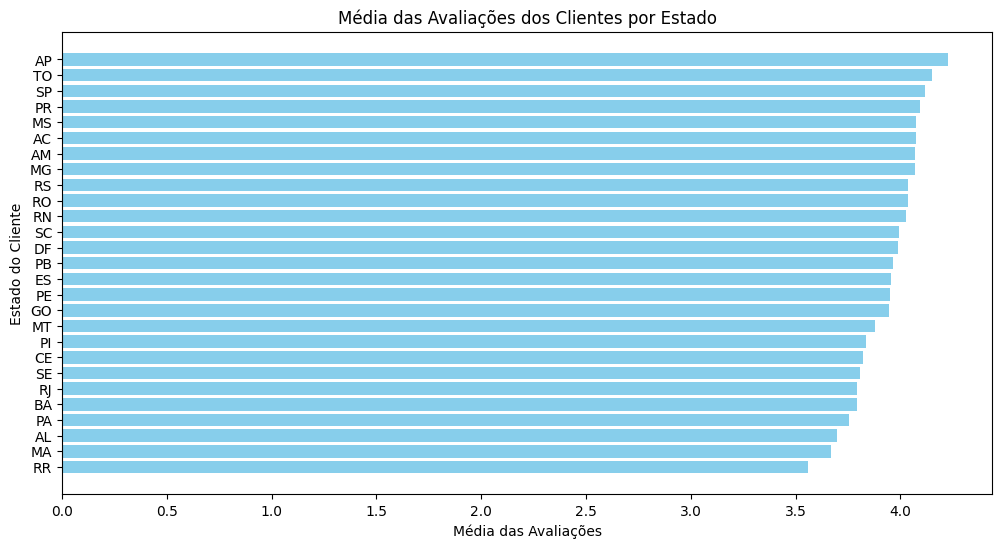

In [43]:
# Plotando o gráfico de barras
plt.figure(figsize = (12, 6))
plt.barh(avg_score_per_state['customer_state'], avg_score_per_state['Average Review Ratings'], color = 'skyblue')
plt.ylabel('Estado do Cliente')
plt.xlabel('Média das Avaliações')
plt.title('Média das Avaliações dos Clientes por Estado')
plt.show()

### Pergunta 4.4 - Nível de Satisfação do Cliente com Gauge Charts

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       116581 non-null  object         
 1   order_id3                      116581 non-null  object         
 2   customer_id3                   116581 non-null  object         
 3   order_status                   116581 non-null  object         
 4   order_purchase_timestamp       116581 non-null  datetime64[ns] 
 5   order_approved_at              116581 non-null  datetime64[ns] 
 6   order_delivered_carrier_date   116581 non-null  datetime64[ns] 
 7   order_delivered_customer_date  116581 non-null  datetime64[ns] 
 8   order_estimated_delivery_date  116581 non-null  datetime64[ns] 
 9   order_item_id                  116581 non-null  float64        
 10  product_id3                    116581 non-null  object  

In [45]:
# Média de avaliação por estado do usuário
avg_score_per_user = df2.groupby('customer_id', as_index = False).agg({'review_score': ['mean']})
avg_score_per_user.columns = ['customer_id', 'Average Review Ratings']

In [46]:
avg_score_per_user.head()

,customer_id,Average Review Ratings
0,1,1.0
1,2,3.0
2,3,5.0
3,4,5.0
4,5,5.0


In [47]:
avg_score_per_user.shape

(97255, 2)

Seria inviável entregar um gráfico com esse volume de dados. Vamos simplificar os dados e observá-los por outra perspectiva.

In [48]:
avg_score_per_user['Average Review Ratings'].value_counts()

Average Review Ratings
5.000000    56211
4.000000    18760
1.000000    10974
3.000000     8091
2.000000     3093
4.500000       54
2.500000       36
3.500000       26
1.500000        8
3.333333        1
4.333333        1
Name: count, dtype: int64

In [49]:
# Função para separar as avaliações em 3 níveis
def prep_label_review(row):
    if row['Average Review Ratings'] > 3.0 :
        return 'Satisfeito'
    if row['Average Review Ratings'] < 3.0 :
        return 'Insatisfeito'
    if row['Average Review Ratings'] == 3.0 :
        return 'Neutro'

In [50]:
# Aplica a função
avg_score_per_user['satprediction'] = avg_score_per_user.apply(lambda row: prep_label_review(row), axis = 1)

In [51]:
# Contagem por elemento
contagem_por_elemento = avg_score_per_user['satprediction'].value_counts()

In [52]:
contagem_por_elemento

satprediction
Satisfeito      75053
Insatisfeito    14111
Neutro           8091
Name: count, dtype: int64

In [53]:
# Converte em tipo Series
serie = pd.Series(contagem_por_elemento)

In [54]:
a = serie.loc['Satisfeito']

In [55]:
b = serie.loc['Insatisfeito']

In [56]:
c = serie.loc['Neutro']

In [57]:
# Calculas o percentual de satisfeitos em relação ao total
percentual_satisfeito = (a / (a + b + c)) * 100

In [58]:
percentual_satisfeito

np.float64(77.17135365790962)

In [59]:
# Plot
# Observe que usaremos como referência percentual de 70
fig = go.Figure(go.Indicator(domain = {'x': [0, 1], 'y': [0, 1]},
                             value = percentual_satisfeito,
                             mode = "gauge+number+delta",
                             title = {'text': "Nível de Satisfação do Cliente\n"},
                             delta = {'reference': 70},
                             gauge = {'axis': {'range': [None, 100]}, 'steps' : [
                                 {'range': [0, 50], 'color': "lightgray"},
                                 {'range': [50, 80], 'color': "gray"}],
                                      'threshold' : {'line': {'color': "red", 'width': 4}, 
                                                     'thickness': 0.75, 'value': 70}}))

fig.show()

## Cena 5 - Métricas Para Análise de Marketing

### Pergunta 5.1 - Métricas Horizontais

Métricas horizontais são indicadores de desempenho que se aplicam e são comparáveis ​​através de diferentes indústrias, produtos ou canais. Elas oferecem uma visão geral do desempenho e são úteis para benchmarking e comparações genéricas.

Estas métricas são menos sobre os detalhes específicos de um produto, campanha ou indústria e mais sobre tendências e padrões gerais que podem ser observados em vários setores.

In [60]:
# Total de prepamento por ano
total_rev_year = df2.groupby(['order_purchase_year'], as_index = False).payment_value.sum()

In [61]:
total_rev_year

,order_purchase_year,payment_value
0,2016,75044.76
1,2017,9080448.56
2,2018,11002557.43


In [62]:
# Busca os ids únicos de pedido
total_orders = df2.groupby(['order_purchase_year'], as_index = False).order_id.nunique()
total_orders

,order_purchase_year,order_id
0,2016,309
1,2017,43788
2,2018,53158


In [63]:
# Número único de categorias
total_category = df2.product_category_name.nunique()
total_category

71

In [64]:
# Número único de clientes
total_customers = df2.customer_unique_id.nunique()
total_customers

94087

### Pergunta 5.2 - Métricas Verticais

Métricas verticais são indicadores de desempenho específicos de uma indústria, nicho de mercado ou tipo de produto. Elas levam em consideração as peculiaridades e os requisitos únicos de determinados setores ou campanhas.

Essas métricas aprofundam-se nos aspectos específicos e detalhados de uma indústria ou campanha, oferecendo insights mais precisos e relevantes para objetivos específicos.

In [65]:
# Filtra os dados de 2018 
df5 = df_prep[df_prep.order_purchase_year == 2018]

In [66]:
# Total de vendas por categoria
sales_per_category = df5.groupby(['product_category_name_english'], as_index = False).payment_value.sum()
sales_per_category = sales_per_category.sort_values(by = ['payment_value'], ascending = False)
sales_per_category.columns = ['Product Category', 'Sales Revenue']

In [67]:
# Filtra os top 20
sales_per_category = sales_per_category[:20]

In [69]:
# Labels e valores
labels = sales_per_category['Product Category']
values = sales_per_category['Sales Revenue']

In [70]:
# Cria o gráfico de barras horizontais
fig = go.Figure(data = [go.Bar(x = values, y = labels, orientation = 'h')])

# Adiciona título e rótulos aos eixos
fig.update_layout(title = 'Total de Vendas por Categoria em 2018',
                  xaxis_title = 'Receita de Vendas',
                  yaxis_title = 'Categoria do Produto',
                  yaxis = {'categoryorder':'total ascending'})  # Ordena as barras pela receita

# Exibe o gráfico
fig.show()

### Pergunta 5.3 - Receita de Vendas Por Categoria, Por Ano e Por Mês - Trabalhando com 4 Dimensões

In [71]:
# Vendas por categorias ao longo dos anos
total_rev = df_prep.groupby(['order_purchase_year', 
                            'order_purchase_mon', 
                            'product_category_name_english'], as_index = False).payment_value.sum()

In [72]:
# Ajusta os nomes das colunas
total_rev.columns = ['Sales Year', 'Sales Month', 'Product Category', 'Sales Revenue']

In [73]:
total_rev.head()

,Sales Year,Sales Month,Product Category,Sales Revenue
0,2016,Dec,fashion bags accessories,19.62
1,2016,Oct,air conditioning,4675.43
2,2016,Oct,audio,183.03
3,2016,Oct,auto,2716.70
4,2016,Oct,baby,2344.43


In [74]:
# Plot com 4 dimensões (NÃO USE ALGO ASSIM!!!)
fig = px.sunburst(total_rev, 
                  path = ['Sales Year', 'Product Category', 'Sales Month'], 
                  values = 'Sales Revenue',
                  color = 'Sales Revenue', 
                  hover_data = ['Sales Revenue'],
                  color_continuous_scale = 'RdBu',
                  color_continuous_midpoint = np.average(total_rev['Sales Revenue'], 
                                                         weights = total_rev['Sales Revenue']))
fig.show()

In [75]:
# Plot com 3 dimensões (Ainda está ruim!!!)
fig = px.sunburst(total_rev, 
                  path = ['Sales Year', 'Product Category'], 
                  values = 'Sales Revenue',
                  color = 'Sales Revenue', 
                  hover_data = ['Sales Revenue'],
                  color_continuous_scale = 'RdBu',
                  color_continuous_midpoint = np.average(total_rev['Sales Revenue'], 
                                                         weights = total_rev['Sales Revenue']))
fig.show()

In [77]:
# Plotando o gráfico de barras (Ainda está ruim!!!)
fig = px.bar(total_rev, 
             x = 'Product Category', 
             y = 'Sales Revenue', 
             color = 'Sales Revenue', 
             facet_col = 'Sales Year',  # Cria um gráfico separado para cada ano de vendas
             hover_data = ['Sales Revenue'],
             color_continuous_scale = 'RdBu',
             color_continuous_midpoint = np.average(total_rev['Sales Revenue'], 
                                                    weights = total_rev['Sales Revenue']))

fig.show()

In [78]:
total_rev.shape

(1252, 4)

In [79]:
# Filtra os dados de 2018 
df6 = df_prep[df_prep['order_purchase_year'] == 2018]

In [80]:
# Vendas ao longo de 2018
total_rev_2018 = df6.groupby(['order_purchase_year', 
                              'order_purchase_mon', 
                              'product_category_name_english'], as_index = False).payment_value.sum()

In [81]:
# Ajusta os nomes das colunas
total_rev_2018.columns = ['Sales Year', 'Sales Month', 'Product Category', 'Sales Revenue']

In [82]:
total_rev_2018.shape

(518, 4)

In [83]:
# Plot dos dados de 2018 (Começou a melhorar!)
fig = px.sunburst(total_rev_2018, 
                  path = ['Sales Year', 'Product Category', 'Sales Month'], 
                  values = 'Sales Revenue',
                  color = 'Sales Revenue', 
                  hover_data = ['Sales Revenue'],
                  color_continuous_scale = 'RdBu',
                  color_continuous_midpoint = np.average(total_rev_2018['Sales Revenue'], 
                                                         weights = total_rev_2018['Sales Revenue']))
fig.show()

In [84]:
# Ordena o resultado por total de faturamento
total_rev_2018 = total_rev_2018.sort_values(by = 'Sales Revenue', ascending = True)

In [85]:
# Filtra os top 10
total_rev_2018 = total_rev_2018[:10]

In [86]:
# Plot
fig = px.sunburst(total_rev_2018, 
                  path = ['Sales Year', 'Product Category', 'Sales Month'], 
                  values = 'Sales Revenue',
                  color = 'Sales Revenue', 
                  hover_data = ['Sales Revenue'],
                  color_continuous_scale = 'RdBu',
                  color_continuous_midpoint = np.average(total_rev_2018['Sales Revenue'], 
                                                         weights = total_rev_2018['Sales Revenue']))
fig.show()

In [87]:
# Plotando o gráfico de barras
fig = px.bar(total_rev_2018, 
             x = 'Product Category', 
             y = 'Sales Revenue', 
             color = 'Sales Revenue', 
             facet_col = 'Sales Year',  # Cria um gráfico separado para cada ano de vendas
             facet_row = 'Sales Month', # Cria um subgráfico separado para cada mês de vendas
             hover_data = ['Sales Revenue'],
             color_continuous_scale = 'RdBu',
             height = 1000,
             color_continuous_midpoint = np.average(total_rev_2018['Sales Revenue'], 
                                                    weights = total_rev_2018['Sales Revenue']))

fig.show()

### Pergunta 5.4 - Receita de Vendas Por Hora - Gráfico de Barras x Gráfico de Pizza - A Batalha Final

In [88]:
# Receita de vendas de 2018 agrupada por hora do dia quando ocorreu a venda
total_rev_hour = df_prep[df_prep['order_purchase_year'] == 2018].groupby(['order_purchase_hour'], 
                                                                       as_index = False).payment_value.sum()

In [89]:
# Nomes de colunas
total_rev_hour.columns = ['Sales Hour', 'Sales Revenue']

In [90]:
total_rev_hour.head()

,Sales Hour,Sales Revenue
0,0,259590.91
1,1,94903.13
2,2,48887.02
3,3,27073.97
4,4,15865.59


In [91]:
total_rev_hour.tail()

,Sales Hour,Sales Revenue
19,19,639093.04
20,20,679084.34
21,21,641839.78
22,22,591816.53
23,23,371116.32


In [92]:
# Labels das horas de vendas
labels = total_rev_hour['Sales Hour']

In [93]:
# Valores de receita de vendas
values = total_rev_hour['Sales Revenue']

In [94]:
# Cria o gráfico de barras
fig = go.Figure(data = [go.Bar(x = labels, y = values, marker_line_width = 0)]) 

# Adiciona título e rótulos aos eixos
fig.update_layout(title = 'Receita de Vendas por Hora - Gráfico de Barras',
                  xaxis_title = 'Hora do Dia',
                  yaxis_title = 'Receita de Vendas')

# Exibe o gráfico
fig.show()

In [95]:
# Prepara os dados
labels = total_rev_hour['Sales Hour']
values = total_rev_hour['Sales Revenue']

In [96]:
# Cria o gráfico de pizza
fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole = .2)])

# Adiciona título e rótulos aos eixos
fig.update_layout(title = 'Receita de Vendas por Hora - Gráfico de Pizza',
                  xaxis_title = 'Hora do Dia',
                  yaxis_title = 'Receita de Vendas')

# Exibe o gráfico
fig.show()

In [97]:
# Vendas por categoria por hora (alternativa ao gráfico de pizza)
fig = px.sunburst(total_rev_hour, 
                  path = ['Sales Hour'], 
                  values = 'Sales Revenue',
                  color = 'Sales Revenue', 
                  hover_data = ['Sales Revenue'],
                  color_continuous_scale = 'RdBu',
                  color_continuous_midpoint = np.average(total_rev_hour['Sales Revenue'], 
                                                         weights = total_rev_hour['Sales Revenue']))

# Adiciona título e rótulos aos eixos
fig.update_layout(title = 'Receita de Vendas por Hora - Gráfico Sunburst')

# Exibe o gráfico
fig.show()

### Pergunta 5.5 - Vendas Por Categoria Por Dia da Semana

In [98]:
# Vendas por categoria por dia da semana
total_rev_hour = df_prep[df_prep['order_purchase_year'] == 2018].groupby(['order_purchase_day', 
                                                                        'product_category_name_english'], 
                                                                       as_index = False).payment_value.sum()

In [99]:
total_rev_hour.columns = ['Sales DayofWeek', 'Product Category' , 'Sales Revenue']
total_rev_hour.head()

,Sales DayofWeek,Product Category,Sales Revenue
0,Fri,agro industry and commerce,5839.40
1,Fri,air conditioning,5826.38
2,Fri,art,2398.56
3,Fri,arts and craftmanship,408.95
4,Fri,audio,4834.79


In [101]:
# Plot

# Labels
labels = total_rev_hour['Sales DayofWeek']
values = total_rev_hour['Sales Revenue']

# Gráfico
fig = go.Figure(data = [go.Bar(x = labels, y = values)])

# Adiciona título e rótulos aos eixos
fig.update_layout(title = 'Receita de Vendas Por Categoria Por Dia da Semana')
fig.show()

### Pergunta 5.6 - Total de Vendas Por Categoria e Por Dia da Semana com Gráfico Sunburst

In [102]:
# Ordena o resultado por total de faturamento
total_rev_hour = total_rev_hour.sort_values(by = 'Sales Revenue', ascending = True)

In [103]:
total_rev_hour = total_rev_hour[:10]

In [104]:
# Plot
fig = px.sunburst(total_rev_hour, 
                  path = ['Sales DayofWeek', 'Product Category'], 
                  values = 'Sales Revenue',
                  color = 'Sales Revenue', 
                  hover_data = ['Product Category'],
                  color_continuous_scale = 'RdBu',
                  color_continuous_midpoint = np.average(total_rev_hour['Sales Revenue'], 
                                                         weights = total_rev_hour['Sales Revenue']))
fig.show()

In [105]:
# Plot

# Labels
labels = total_rev_hour['Sales DayofWeek']
values = total_rev_hour['Sales Revenue']

# Gráfico
fig = go.Figure(data = [go.Bar(x = labels, y = values)])

# Adiciona título e rótulos aos eixos
fig.update_layout(title = 'Receita de Vendas Por Categoria Por Dia da Semana')
fig.show()

### Pergunta 5.7 - Atividades Por Categoria com Gráfico de Funil

In [106]:
# Atividade (pedidos) por categoria
cat_activity = df_prep[df_prep['order_purchase_year'] == 2018].groupby(['product_category_name_english']).order_id.nunique()
cat_activity = pd.DataFrame(cat_activity)
cat_activity.columns = [ 'Activity']
cat_activity = cat_activity.sort_values(by = ['Activity'], ascending = False)
cat_activity.head()

,Activity
product_category_name_english,
health beauty,5402
bed bath table,4909
sports leisure,4058
computers accessories,4053
watches gifts,3493


In [107]:
# Plot
fig = px.funnel_area(names = cat_activity.index, values = cat_activity.Activity)
fig.show()

In [108]:
%reload_ext watermark
%watermark -a "Silmara Basso"

Author: Silmara Basso



In [ ]:
#%watermark -v -m

Python implementation: CPython
Python version       : 3.13.6
IPython version      : 9.4.0

Compiler    : Clang 15.0.0 (clang-1500.3.9.4)
OS          : Darwin
Release     : 23.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit



In [ ]:
#%watermark --iversions

pandas    : 2.3.1
colorlover: 0.3.0
matplotlib: 3.10.3
numpy     : 2.3.1
plotly    : 6.2.0
seaborn   : 0.13.2



# Fim